# Propiedad de Vallecillo Ignacio Manuel



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importacion de las librerías

In [156]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas_profiling

Cargamos el dataset

In [87]:
df = pd.read_csv('/content/drive/MyDrive/Coderhouse-DataScience2022/Entregables Coder/Dataset/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Para hacer mas legible los graficos tome prestado codigo para cambiar las siglas por sus significados.

In [89]:
df_show = df
df_show = df_show.drop(columns='Unnamed: 0')
 #Remote_ratio
df_show.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)

# Experience Level
df_show.experience_level.replace(['EN','MI','SE','EX'],['Entry','Mid','Senior','Executive'],inplace=True)

# Employment Type
employment_type_dict = {'FT':'Full Time',
                        'PT':'Part Time',
                        'CT':'Contract',
                        'FL':'Freelance'}

df_show['employment_type'] = df_show['employment_type'].map(employment_type_dict)

# ISO
ISO3166 = {
	'AD': 'Andorra',
	'AE': 'United Arab Emirates',
	'AF': 'Afghanistan',
	'AG': 'Antigua & Barbuda',
	'AI': 'Anguilla',
	'AL': 'Albania',
	'AM': 'Armenia',
	'AN': 'Netherlands Antilles',
	'AO': 'Angola',
	'AQ': 'Antarctica',
	'AR': 'Argentina',
	'AS': 'American Samoa',
	'AT': 'Austria',
	'AU': 'Australia',
	'AW': 'Aruba',
	'AZ': 'Azerbaijan',
	'BA': 'Bosnia and Herzegovina',
	'BB': 'Barbados',
	'BD': 'Bangladesh',
	'BE': 'Belgium',
	'BF': 'Burkina Faso',
	'BG': 'Bulgaria',
	'BH': 'Bahrain',
	'BI': 'Burundi',
	'BJ': 'Benin',
	'BM': 'Bermuda',
	'BN': 'Brunei Darussalam',
	'BO': 'Bolivia',
	'BR': 'Brazil',
	'BS': 'Bahama',
	'BT': 'Bhutan',
	'BU': 'Burma (no longer exists)',
	'BV': 'Bouvet Island',
	'BW': 'Botswana',
	'BY': 'Belarus',
	'BZ': 'Belize',
	'CA': 'Canada',
	'CC': 'Cocos (Keeling) Islands',
	'CF': 'Central African Republic',
	'CG': 'Congo',
	'CH': 'Switzerland',
	'CI': 'Côte D\'ivoire (Ivory Coast)',
	'CK': 'Cook Iislands',
	'CL': 'Chile',
	'CM': 'Cameroon',
	'CN': 'China',
	'CO': 'Colombia',
	'CR': 'Costa Rica',
	'CS': 'Czechoslovakia (no longer exists)',
	'CU': 'Cuba',
	'CV': 'Cape Verde',
	'CX': 'Christmas Island',
	'CY': 'Cyprus',
	'CZ': 'Czech Republic',
	'DD': 'German Democratic Republic (no longer exists)',
	'DE': 'Germany',
	'DJ': 'Djibouti',
	'DK': 'Denmark',
	'DM': 'Dominica',
	'DO': 'Dominican Republic',
	'DZ': 'Algeria',
	'EC': 'Ecuador',
	'EE': 'Estonia',
	'EG': 'Egypt',
	'EH': 'Western Sahara',
	'ER': 'Eritrea',
	'ES': 'Spain',
	'ET': 'Ethiopia',
	'FI': 'Finland',
	'FJ': 'Fiji',
	'FK': 'Falkland Islands (Malvinas)',
	'FM': 'Micronesia',
	'FO': 'Faroe Islands',
	'FR': 'France',
	'FX': 'France, Metropolitan',
	'GA': 'Gabon',
	'GB': 'United Kingdom (Great Britain)',
	'GD': 'Grenada',
	'GE': 'Georgia',
	'GF': 'French Guiana',
	'GH': 'Ghana',
	'GI': 'Gibraltar',
	'GL': 'Greenland',
	'GM': 'Gambia',
	'GN': 'Guinea',
	'GP': 'Guadeloupe',
	'GQ': 'Equatorial Guinea',
	'GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands',
	'GT': 'Guatemala',
	'GU': 'Guam',
	'GW': 'Guinea-Bissau',
	'GY': 'Guyana',
	'HK': 'Hong Kong',
	'HM': 'Heard & McDonald Islands',
	'HN': 'Honduras',
	'HR': 'Croatia',
	'HT': 'Haiti',
	'HU': 'Hungary',
	'ID': 'Indonesia',
	'IE': 'Ireland',
	'IL': 'Israel',
	'IN': 'India',
	'IO': 'British Indian Ocean Territory',
	'IQ': 'Iraq',
	'IR': 'Islamic Republic of Iran',
	'IS': 'Iceland',
	'IT': 'Italy',
	'JM': 'Jamaica',
	'JO': 'Jordan',
	'JP': 'Japan',
	'KE': 'Kenya',
	'KG': 'Kyrgyzstan',
	'KH': 'Cambodia',
	'KI': 'Kiribati',
	'KM': 'Comoros',
	'KN': 'St. Kitts and Nevis',
	'KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'Korea, Republic of',
	'KW': 'Kuwait',
	'KY': 'Cayman Islands',
	'KZ': 'Kazakhstan',
	'LA': 'Lao People\'s Democratic Republic',
	'LB': 'Lebanon',
	'LC': 'Saint Lucia',
	'LI': 'Liechtenstein',
	'LK': 'Sri Lanka',
	'LR': 'Liberia',
	'LS': 'Lesotho',
	'LT': 'Lithuania',
	'LU': 'Luxembourg',
	'LV': 'Latvia',
	'LY': 'Libyan Arab Jamahiriya',
	'MA': 'Morocco',
	'MC': 'Monaco',
	'MD': 'Moldova, Republic of',
	'MG': 'Madagascar',
	'MH': 'Marshall Islands',
	'ML': 'Mali',
	'MN': 'Mongolia',
	'MM': 'Myanmar',
	'MO': 'Macau',
	'MP': 'Northern Mariana Islands',
	'MQ': 'Martinique',
	'MR': 'Mauritania',
	'MS': 'Monserrat',
	'MT': 'Malta',
	'MU': 'Mauritius',
	'MV': 'Maldives',
	'MW': 'Malawi',
	'MX': 'Mexico',
	'MY': 'Malaysia',
	'MZ': 'Mozambique',
	'NA': 'Namibia',
	'NC': 'New Caledonia',
	'NE': 'Niger',
	'NF': 'Norfolk Island',
	'NG': 'Nigeria',
	'NI': 'Nicaragua',
	'NL': 'Netherlands',
	'NO': 'Norway',
	'NP': 'Nepal',
	'NR': 'Nauru',
	'NT': 'Neutral Zone (no longer exists)',
	'NU': 'Niue',
	'NZ': 'New Zealand',
	'OM': 'Oman',
	'PA': 'Panama',
	'PE': 'Peru',
	'PF': 'French Polynesia',
	'PG': 'Papua New Guinea',
	'PH': 'Philippines',
	'PK': 'Pakistan',
	'PL': 'Poland',
	'PM': 'St. Pierre & Miquelon',
	'PN': 'Pitcairn',
	'PR': 'Puerto Rico',
	'PT': 'Portugal',
	'PW': 'Palau',
	'PY': 'Paraguay',
	'QA': 'Qatar',
	'RE': 'Réunion',
	'RO': 'Romania',
	'RU': 'Russian Federation',
	'RW': 'Rwanda',
	'SA': 'Saudi Arabia',
	'SB': 'Solomon Islands',
	'SC': 'Seychelles',
	'SD': 'Sudan',
	'SE': 'Sweden',
	'SG': 'Singapore',
	'SH': 'St. Helena',
	'SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands',
	'SK': 'Slovakia',
	'SL': 'Sierra Leone',
	'SM': 'San Marino',
	'SN': 'Senegal',
	'SO': 'Somalia',
	'SR': 'Suriname',
	'ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)',
	'SV': 'El Salvador',
	'SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland',
	'TC': 'Turks & Caicos Islands',
	'TD': 'Chad',
	'TF': 'French Southern Territories',
	'TG': 'Togo',
	'TH': 'Thailand',
	'TJ': 'Tajikistan',
	'TK': 'Tokelau',
	'TM': 'Turkmenistan',
	'TN': 'Tunisia',
	'TO': 'Tonga',
	'TP': 'East Timor',
	'TR': 'Turkey',
	'TT': 'Trinidad & Tobago',
	'TV': 'Tuvalu',
	'TW': 'Taiwan, Province of China',
	'TZ': 'Tanzania, United Republic of',
	'UA': 'Ukraine',
	'UG': 'Uganda',
	'UM': 'United States Minor Outlying Islands',
	'US': 'United States of America',
	'UY': 'Uruguay',
	'UZ': 'Uzbekistan',
	'VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines',
	'VE': 'Venezuela',
	'VG': 'British Virgin Islands',
	'VI': 'United States Virgin Islands',
	'VN': 'Viet Nam',
	'VU': 'Vanuatu',
	'WF': 'Wallis & Futuna Islands',
	'WS': 'Samoa',
	'YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen',
	'YT': 'Mayotte',
	'YU': 'Yugoslavia',
	'ZA': 'South Africa',
	'ZM': 'Zambia',
	'ZR': 'Zaire',
	'ZW': 'Zimbabwe',
	'ZZ': 'Unknown or unspecified country',
}

df_show['employee_residence'] = df_show['employee_residence'].map(ISO3166)
df_show['company_location'] = df_show['company_location'].map(ISO3166)

#Company Size
company_size_dict={'S': 'Small',
                  'M':'Medium',
                  'L':'Large'}
df_show.company_size = df_show['company_size'].map(company_size_dict)


In [90]:
df_show.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full Time,Data Scientist,70000,EUR,79833,Germany,On-site,Germany,Large
1,2020,Senior,Full Time,Machine Learning Scientist,260000,USD,260000,Japan,On-site,Japan,Small
2,2020,Senior,Full Time,Big Data Engineer,85000,GBP,109024,United Kingdom (Great Britain),Partially Remote,United Kingdom (Great Britain),Medium
3,2020,Mid,Full Time,Product Data Analyst,20000,USD,20000,Honduras,On-site,Honduras,Small
4,2020,Senior,Full Time,Machine Learning Engineer,150000,USD,150000,United States of America,Partially Remote,United States of America,Large


In [98]:
df = df_show

Cantidad de registros y cantidad de columnas que tiene el DF.

In [99]:
df.shape

(607, 11)

In [100]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,605.0,2021.406612,6.928843e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,605.0,324870.145455,1.546836e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,605.0,112461.611570,7.098495e+04,2859.0,62726.0,102100.0,150000.0,600000.0


Obtener la totalidad de registros por columnas

In [101]:
df.count()

work_year             607
experience_level      607
employment_type       607
job_title             607
salary                607
salary_currency       607
salary_in_usd         607
employee_residence    605
remote_ratio          607
company_location      607
company_size          607
dtype: int64

Cantidad de registros que contienen null

In [102]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    2
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [103]:
porc_null = (2/607)*100
print(f'El porcentaje de valores nulos es: {round(porc_null,2)}')
df = df.dropna()
print(f'Por lo tanto, al ser insignificante procedo a eliminarlos, quedando el dataset con {df.shape[0]} registros.')


El porcentaje de valores nulos es: 0.33
Por lo tanto, al ser insignificante procedo a eliminarlos, quedando el dataset con 605 registros.


**Matriz de Confusion de Variables Numericas**


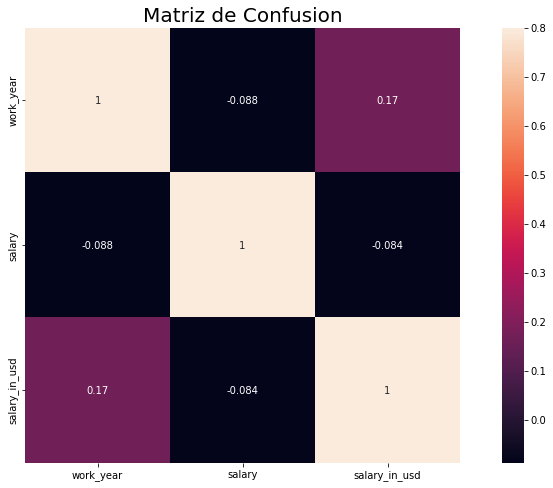

In [107]:
fig, ax = plt.subplots() 
fig.set_size_inches(15,8)

sns.heatmap(df.corr(), vmax =.8, square = True, annot = True)
plt.title('Matriz de Confusion',fontsize=20);
plt.show()

Se puede observar que hay practicamente nula correlacion entre las variables numericas.

# Analisis Bivariado

Observemos el Ranking de Titulos de Trabajo con respecto a su Media salarial y la Cantidad de Empleados con ese Titulo.

In [104]:
df_ranking = df.groupby('job_title').agg(mean_salary_usd=('salary_in_usd', 'mean'), count=('job_title', 'count')).sort_values(by=['mean_salary_usd', 'count'], ascending=False)
#df_ranking = df_ranking[df_ranking['count']>=0]
df_ranking.rename(columns={'job_title':'Titulo del trabajo','mean_salary_usd':'Media Salarial en USD','count':'Cantidad de Empleados' },inplace=True)
print('Ranking de Trabajos segun su Media Salarial \n\n')
round(df_ranking.head(10), 2)

Ranking de Trabajos segun su Media Salarial 




,Media Salarial en USD,Cantidad de Empleados
job_title,,
Data Analytics Lead,405000.00,1
Principal Data Engineer,328333.33,3
Financial Data Analyst,275000.00,2
Principal Data Scientist,215242.43,7
Director of Data Science,195074.00,7
Data Architect,177873.91,11
Applied Data Scientist,175655.00,5
Analytics Engineer,175000.00,4
Data Specialist,165000.00,1


Ranking de Trabajos segun su Media Salarial y cuya cantidad de empleados sea >=10 

In [129]:
df_ranking = df_ranking[df_ranking['Cantidad de Empleados']>=10]
round(df_ranking.head(10), 2)

,Media Salarial en USD,Cantidad de Empleados
job_title,,
Data Architect,177873.91,11
Data Science Manager,158328.50,12
Data Engineer,112725.00,132
Research Scientist,109620.80,15
Data Scientist,108769.92,142
Machine Learning Engineer,104880.15,41
Data Analyst,92893.06,97


Relacion entre **experience_level** y **salary_in_usd**

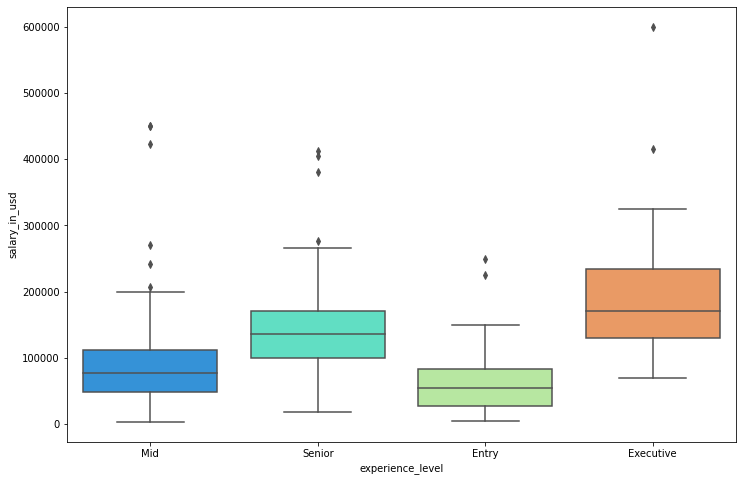

In [108]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='experience_level',y='salary_in_usd',data=df,palette='rainbow')

Relacion entre **employee_residence** y **salary_currency**

Text(0.5, 1.0, 'Relacion entre employee_residence y salary_currency')

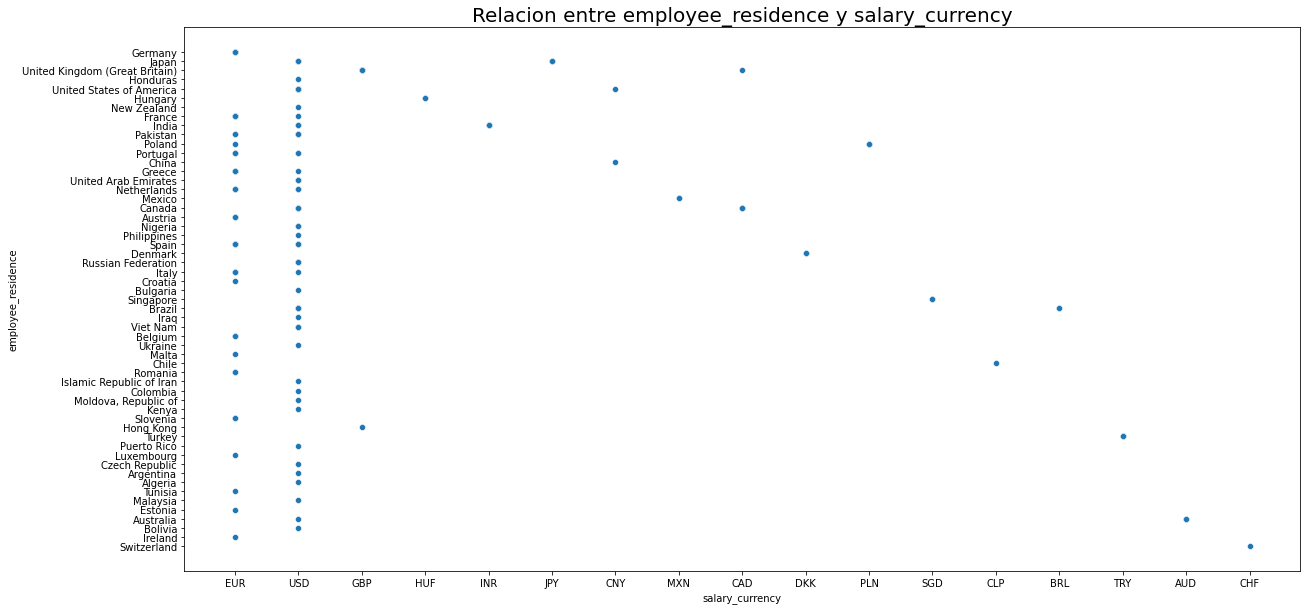

In [155]:
plt.figure(figsize=(20,10))
sns.scatterplot(y="employee_residence", x="salary_currency", data=df)
plt.title('Relacion entre employee_residence y salary_currency', fontsize = 20, fontweight = 30)


Se puede observar como en la mayoria de los paises se paga en EUR y primariamente en USD, en relacion al resto de las divisas.

Relacion entre **employment_type** y **salary_in_usd**

Text(0.5, 1.0, 'Relacion entre employment_type y salary_in_usd')

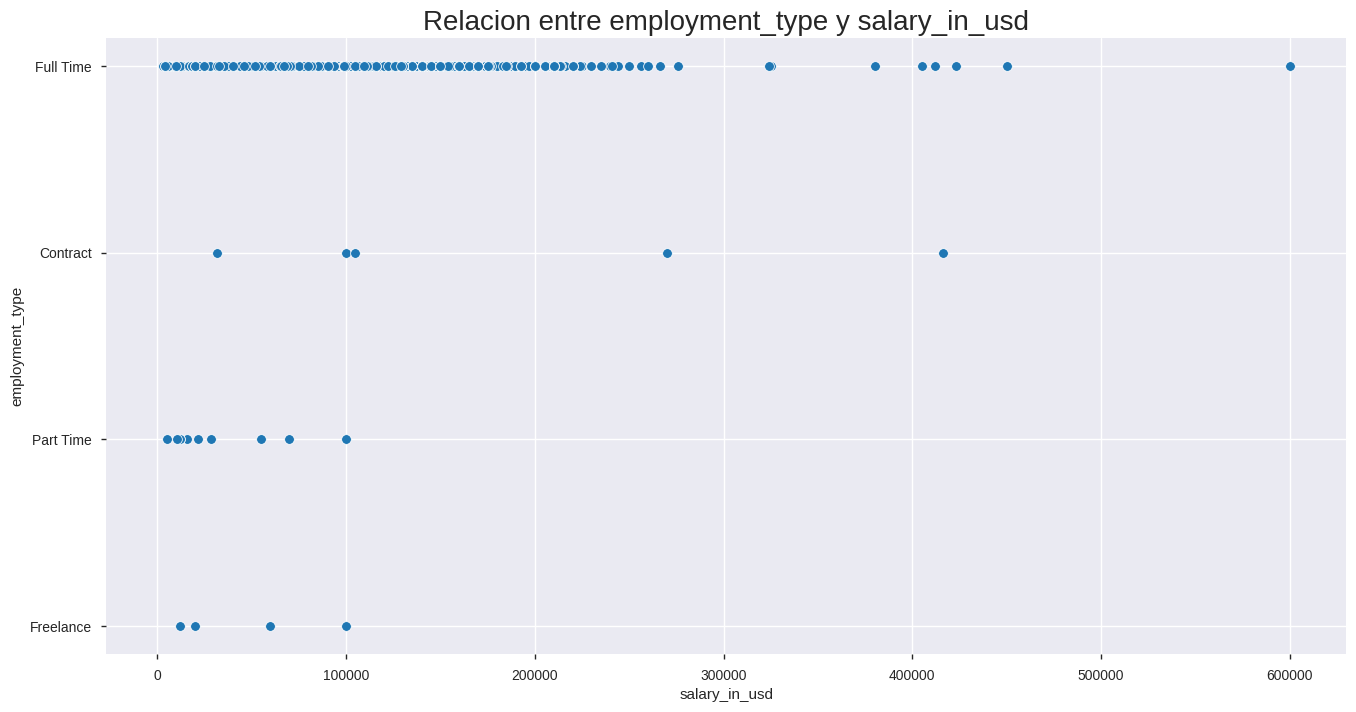

In [161]:
plt.figure(figsize=(16,8))
sns.scatterplot(y='employment_type', x="salary_in_usd", data=df)
plt.title('Relacion entre employment_type y salary_in_usd', fontsize = 20, fontweight = 30)

Se observa que la mayoria de los profesionales en el rubro optan por trabajar en formato Full Time, que ademas es donde los sueldos son mas altos, probablemente tenga que ver con los puestos de liderazgo.